# Who wants to be a film maker?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The movie data displayed below represents data of approximately 10,000 movies collected from The Movie Database. This analysis is aimed at giving someone who is looking to enter the movie industry some important items to consider (especially if their goal is to generate high profit from their movie).

#### Questions Asked

<ul>
<li> How has movie profits, movie budgets, and the number of movies changed over time?</li>
<li> What are the most popular movie genres? Are the most popular movie genres also the most common?</li>
<li> Does genre commonality and genre popularity affect movie revenue?</li>
<li> Do high budgets mean high revenues and profits?</li>
<li> What are the most popular days and months to release a movie? Do these correlate to higher profits?</li>
</ul>

In [182]:
# Import all the packages that are used for this report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [183]:
# Set the style for plots

sns.set_style('ticks')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [184]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [185]:
df.head();

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> I used the info method to give me a consice summary of the information in the dataset. From this I saw that the data is comprised of 21 columns of varying data types. The cells below describe some of the aspects of the data I thought about looking into after using the info method.

In [187]:
# Handle unnecessary columns (columns not ciritcal for the questions we are looking to answer)
df.drop(['id','imdb_id','homepage', 'tagline', 'overview','cast', 'keywords'], axis = 1, inplace = True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


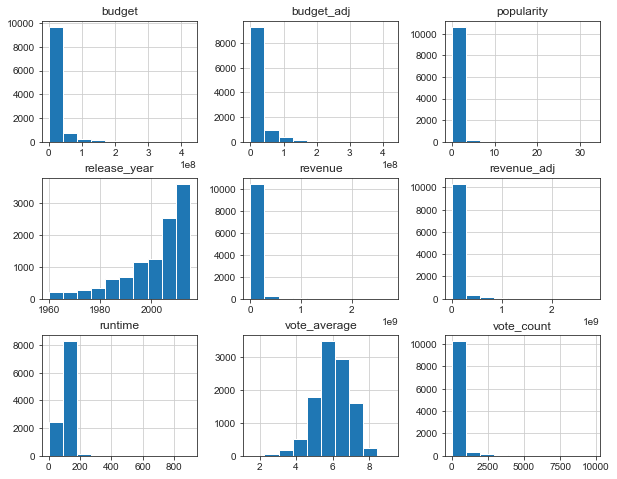

In [189]:
# General distrbution of the data
df.hist(figsize = (10,8));

> After removing unnecessary columns, the next item for attention became columns that have missing values. Since the production_companies columns had the most null values, I started with that column to see if these null values had anything in common.

In [190]:
# Display a dataframe that shows the null values in the 'production_companies column'
df[df['production_companies'].isnull()];

> There wasn't a commonality that stuck out but given that production companies could be an item for interest in determining what high revenue movies have in common, I decided that it was probably best to eliminate these null values as they may provide noise.

> That same logic was applied to the genre and director columns, which also had a large number of null values.

In [191]:
# Drop null values in the 'production_companies' column
df.dropna(subset=['production_companies'], inplace = True) 

In [192]:
df[df['genres'].isnull()];

In [193]:
df.dropna(subset=['genres'], inplace = True) 

In [194]:
df[df['director'].isnull()];

In [195]:
df.dropna(subset=['director'], inplace = True) 

In [196]:
#Check what the new, trimmed dataset looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 14 columns):
popularity              9807 non-null float64
budget                  9807 non-null int64
revenue                 9807 non-null int64
original_title          9807 non-null object
director                9807 non-null object
runtime                 9807 non-null int64
genres                  9807 non-null object
production_companies    9807 non-null object
release_date            9807 non-null object
vote_count              9807 non-null int64
vote_average            9807 non-null float64
release_year            9807 non-null int64
budget_adj              9807 non-null float64
revenue_adj             9807 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


### Data Cleaning

> After trimming down the data, I next took a look at the various data types contained in the set. Something that immediately stood out was that the release_date column was a str rather than a datetime data type

In [197]:
# View the columns in the data frame and their data types
for i in df.columns:
    print(f'{i} {type(df[i][0])}')

popularity <class 'numpy.float64'>
budget <class 'numpy.int64'>
revenue <class 'numpy.int64'>
original_title <class 'str'>
director <class 'str'>
runtime <class 'numpy.int64'>
genres <class 'str'>
production_companies <class 'str'>
release_date <class 'str'>
vote_count <class 'numpy.int64'>
vote_average <class 'numpy.float64'>
release_year <class 'numpy.int64'>
budget_adj <class 'numpy.float64'>
revenue_adj <class 'numpy.float64'>


In [198]:
# Turn the release date into date time data type
df['release_date'] = pd.to_datetime(df['release_date'])

In [199]:
# Extract release year, release month, and day of release as weekday name

df['release_month'] = df['release_date'].dt.month
df['day_of_release'] = df['release_date'].dt.weekday_name
df['release_year'] = df['release_date'].dt.year

# Use the calendar package to turn each individual month int into the respective month name
df['month_of_release'] = df['release_month'].apply(lambda x: calendar.month_abbr[x])

> Because they are all related, the budget, revenue, budget_adj, and revenue_adj columns should all be the same data type

In [200]:
df[['budget', 'revenue', 'budget_adj', 'revenue_adj']].astype(int);

> At this stage, our data appears to be relatively clean.. Before I moved to the data analysis, I wanted to take a peak at what the data was showing and discovered more items that needed to be investigated and/or cleaned

In [201]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,9807.000000,9.807000e+03,9.807000e+03,9807.000000,9807.000000,9807.000000,9807.000000,9.807000e+03,9.807000e+03,9807.000000
mean,0.693133,1.612666e+07,4.407345e+07,102.743245,238.609463,5.966361,2003.766697,1.935178e+07,5.684958e+07,6.876109
std,1.035473,3.216685e+07,1.223983e+08,28.133335,602.052173,0.914297,15.341108,3.562014e+07,1.512176e+08,3.410977
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1968.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.231585,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1996.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.418900,1.457860e+05,0.000000e+00,100.000000,46.000000,6.000000,2006.000000,2.423044e+05,0.000000e+00,7.000000
75%,0.774204,1.900000e+07,3.063954e+07,112.000000,172.000000,6.600000,2012.000000,2.442295e+07,4.254888e+07,10.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2067.000000,4.250000e+08,2.827124e+09,12.000000


> Items that stand out in the above statistics are listed below:
> <ul>
    <li>There are movies with a 0 runtime which by definition is nonsensical for a movie</li>
    <li>There's a large number of movies with 0 budget and/or 0 revenue, which is plausible, but may need to be looked at more closely</li>
    <li> There is a movie with a release year of 2067 which seems nonsensical because we are only in the year 2018. Seeing this makes me question if there are other movies with future release dates </li>
</ul>

In [202]:
# Limit the dataframe to movies with a runtime of greater than 0
df = df[df['runtime'] > 0]

In [203]:
# Create a new dataframe containing values of the dataset that are greater than this current year
new_df = df[df['release_year'] > 2015]

In [204]:
new_df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,day_of_release,month_of_release
9849,3.170651,1100000,59600000,Dr. No,Terence Young,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2062-10-04,560,6.7,2062,7.929294e+06,4.296236e+08,10,Wednesday,Oct
9850,1.168767,15000000,70000000,Lawrence of Arabia,David Lean,216,Adventure|Drama|History|War,Horizon Pictures (II),2062-12-10,517,7.5,2062,1.081267e+08,5.045914e+08,12,Sunday,Dec
9851,0.823779,2000000,0,Lolita,Stanley Kubrick,153,Drama|Romance,Seven Arts Productions|Allied Artists|Transwor...,2062-06-13,168,6.9,2062,1.441690e+07,0.000000e+00,6,Tuesday,Jun
9852,0.810805,2000000,13129846,To Kill a Mockingbird,Robert Mulligan,129,Crime|Drama,Universal Pictures,2062-12-25,317,7.7,2062,1.441690e+07,9.464582e+07,12,Monday,Dec
9853,0.630948,2200000,0,The Manchurian Candidate,John Frankenheimer,126,Mystery|Thriller,MC Productions,2062-10-24,72,7.0,2062,1.585859e+07,0.000000e+00,10,Tuesday,Oct


> After using Google to search some of the movie titles in this new data set, I noticed a trend with all of the years of release for these movies... The release year in the data set is larger by 100 years exaclty for each of these movies.

> I decided to adjust the years rather than remove these titles from the data, and then append the new correct years to the original dataset

In [205]:
new_df['release_date'] = new_df['release_date'].apply(lambda x: x - pd.DateOffset(years=100))
new_df['release_year'] = new_df['release_date'].dt.year

/Users/Godwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Godwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [206]:
df = df[df['release_year'] <= 2015]

In [207]:
df = df.append(new_df)

In [208]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,9794.000000,9.794000e+03,9.794000e+03,9794.000000,9794.000000,9794.000000,9794.000000,9.794000e+03,9.794000e+03,9794.000000
mean,0.693675,1.614774e+07,4.413195e+07,102.879620,238.893098,5.967368,2000.875638,1.937716e+07,5.692504e+07,6.874617
std,1.035909,3.218298e+07,1.224690e+08,27.901676,602.400843,0.914089,13.033300,3.563695e+07,1.513038e+08,3.411079
min,0.000188,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.232351,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.419354,1.583300e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,2.716902e+05,0.000000e+00,7.000000
75%,0.774576,1.900000e+07,3.081720e+07,112.000000,172.750000,6.600000,2011.000000,2.453637e+07,4.264112e+07,10.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,12.000000


In [209]:
# Save edited data frame to a new csv file for easy access
df.to_csv('tmdb-movies-edited.csv', index=False)

In [210]:
df = pd.read_csv('tmdb-movies-edited.csv')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 17 columns):
popularity              9794 non-null float64
budget                  9794 non-null int64
revenue                 9794 non-null int64
original_title          9794 non-null object
director                9794 non-null object
runtime                 9794 non-null int64
genres                  9794 non-null object
production_companies    9794 non-null object
release_date            9794 non-null object
vote_count              9794 non-null int64
vote_average            9794 non-null float64
release_year            9794 non-null int64
budget_adj              9794 non-null float64
revenue_adj             9794 non-null float64
release_month           9794 non-null int64
day_of_release          9794 non-null object
month_of_release        9794 non-null object
dtypes: float64(4), int64(6), object(7)
memory usage: 1.3+ MB


In [212]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,day_of_release,month_of_release
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Tuesday,Jun
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Wednesday,May
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Wednesday,Mar
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Tuesday,Dec
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,Wednesday,Apr


> Looking at our data frame, we can see that there are a number of movies that fit into more than one genre category. Because we want to look at genre as an independent variable, it's of interest to have the generes split across each movie title

In [213]:
# Create a data series that is representative of the genres each movie title contains
g = df['genres'].str.split('|').apply(pd.Series, 1).stack()

In [214]:
g.head()

0  0             Action
   1          Adventure
   2    Science Fiction
   3           Thriller
1  0             Action
dtype: object

> When I look at the data series, I can see that I have what I want but it looks like there is an extra index for each genre

In [215]:
# Drop the extra index level
g.index = g.index.droplevel(-1)

In [216]:
g.head()

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
dtype: object

> Now, we see that movie titles that have multiple genres have their genres split and matched to their indices. I can now join our original data set to this newly created data frame matched by indices

In [217]:
# Delete the old generes columns in the data set
del df['genres']

In [218]:
# Give the partioned movie data series the name of the genres column
g.name = 'genres'

In [219]:
# Join the data series and the data frame together as a new dataframe
genres_df = df.join(g)

In [220]:
genres_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,24691.000000,2.469100e+04,2.469100e+04,24691.000000,24691.000000,24691.000000,24691.000000,2.469100e+04,2.469100e+04,24691.000000
mean,0.749962,1.903737e+07,5.173667e+07,103.308169,270.963306,5.957373,2000.315905,2.287566e+07,6.640255e+07,6.874246
std,1.149638,3.576047e+07,1.373345e+08,27.656106,662.672932,0.896698,12.953117,3.938163e+07,1.676901e+08,3.406713
min,0.000188,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.247429,0.000000e+00,0.000000e+00,91.000000,20.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.441402,1.200000e+06,2.500000e+02,100.000000,51.000000,6.000000,2004.000000,2.000000e+06,3.337797e+02,7.000000
75%,0.834155,2.400000e+07,3.766860e+07,113.000000,196.000000,6.600000,2010.000000,3.049201e+07,5.442830e+07,10.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,12.000000


> Finally, the last potential issue that I may want to deal with are all of the movies with a zero budget or a zero revenue. While zero does make sense for both budget and revenue, I'm a bit skeptical that the movies actually have a zero value for these columns and feel that it is more likely that the reason these columns are zero is that the data is just missing.

> In order to simplify my analysis and make it more uniform, I thought that it would be best to just exclude columns that had a budget and revenue of zero.

In [250]:
genres_adj = genres_df[(genres_df['budget_adj'] != 0) & (genres_df['revenue_adj'] != 0)]

In [251]:
genres_adj.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10190.000000,1.019000e+04,1.019000e+04,10190.000000,10190.000000,10190.000000,10190.000000,1.019000e+04,1.019000e+04,10190.000000
mean,1.273600,4.204375e+07,1.208909e+08,109.661825,580.121786,6.156889,2000.892640,5.001292e+07,1.533060e+08,7.060942
std,1.612775,4.540814e+07,1.930105e+08,20.232787,943.869132,0.788326,11.318108,4.770361e+07,2.332153e+08,3.337601
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,1.000000
25%,0.485760,1.200000e+07,1.547880e+07,96.000000,78.000000,5.700000,1995.000000,1.600935e+07,2.139717e+07,4.000000
50%,0.855982,2.600000e+07,5.120676e+07,106.000000,230.000000,6.200000,2004.000000,3.478008e+07,6.972365e+07,7.000000
75%,1.470363,5.800000e+07,1.430222e+08,119.000000,644.500000,6.700000,2010.000000,7.035940e+07,1.858894e+08,10.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12.000000


> Given that genres_df is an "exploded" version of the original df, I thought that we may want to use the original df in parts of the analysis, as genres_df may skew the number of movies that we are actually looking at.

In [248]:
df_adj = df[(df['budget_adj'] != 0) & (df['revenue_adj'] != 0)]

In [249]:
df_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 9777
Data columns (total 16 columns):
popularity              3808 non-null float64
budget                  3808 non-null int64
revenue                 3808 non-null int64
original_title          3808 non-null object
director                3808 non-null object
runtime                 3808 non-null int64
production_companies    3808 non-null object
release_date            3808 non-null object
vote_count              3808 non-null int64
vote_average            3808 non-null float64
release_year            3808 non-null int64
budget_adj              3808 non-null float64
revenue_adj             3808 non-null float64
release_month           3808 non-null int64
day_of_release          3808 non-null object
month_of_release        3808 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 505.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### How has the number of movies produced changed over time?

> The below graph shows a general upward trend in the number of movies produced from 1960 to 2015. Something that this distribution may indicate is that it might not make sense to compare properties of movies in more recent years to movies in earlier years without some sort of normalization for the number of movies.

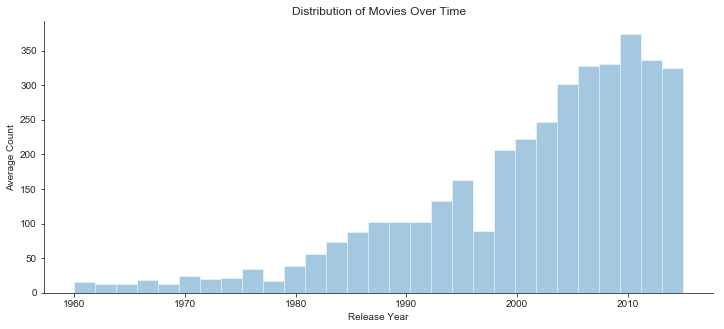

In [449]:
plt.figure(figsize=(12,5));
sns.distplot(df_adj['release_year'], kde = False);
sns.despine();
plt.xlabel("f Year")
plt.ylabel('Average Count')
plt.title("Distribution of Movies Over Time"); 

### What are the most popular and common movie genres? Are the movie genres that are the most common also the most popular?

In [411]:
#What are the top 5 movie genres by count?
count_genres = list(genres_adj['genres'].value_counts().head().index)

In [412]:
genres_adj['genres'].value_counts().head()

Drama        1731
Comedy       1335
Thriller     1196
Action       1077
Adventure     743
Name: genres, dtype: int64

In [413]:
#What are the top 5 movies genres by popularity?
pop_genres = list(genres_adj.groupby('genres')['popularity'].mean().sort_values(ascending = False).head().index)

In [414]:
genres_adj.groupby('genres')['popularity'].mean().sort_values(ascending = False).head()

genres
Adventure          1.880773
Science Fiction    1.876907
Fantasy            1.758474
Animation          1.724374
Action             1.577407
Name: popularity, dtype: float64

In [415]:
#Revenues of the most common movies
count_revs = [genres_adj[genres_adj['genres'] == i]['revenue_adj'].mean() for i in count_genres]

In [416]:
#Revenues of the most popular movies
pop_revs = [genres_adj[genres_adj['genres'] == i]['revenue_adj'].mean() for i in pop_genres]

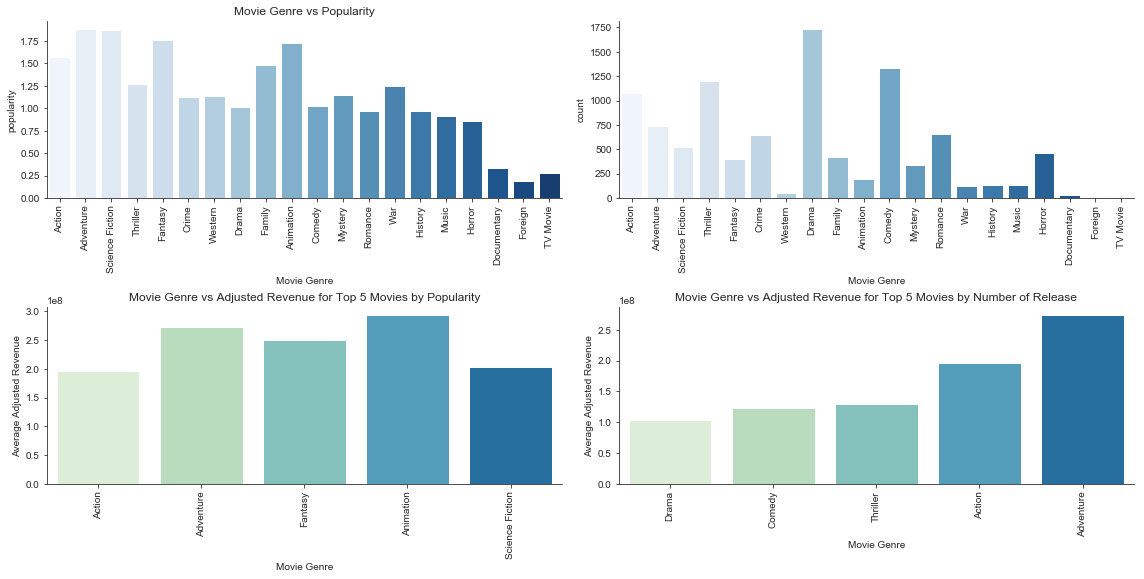

In [450]:
# Create figure and axes for the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,8))
sns.barplot(x = 'genres', y = 'popularity', data = genres_adj, palette = 'Blues', ax = axes[0,0], ci = None)
sns.countplot(x = 'genres', ax = axes[0,1], data = genres_adj, palette = 'Blues')
sns.barplot(x = count_genres, y = count_revs, palette = 'GnBu', ax = axes[1,1]);
sns.barplot(x = pop_genres, y = pop_revs, ax = axes[1,0], palette = 'GnBu', order = ['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction']);
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    ax.set_xlabel("Movie Genre")
plt.tight_layout()
sns.despine()

axes[0,0].set_title("Movie Genre vs Popularity");
axes[1,0].set_title("Movie Genre vs Adjusted Revenue for Top 5 Movies by Popularity");
axes[1,0].set_ylabel("Average Adjusted Revenue");
axes[1,1].set_title("Movie Genre vs Adjusted Revenue for Top 5 Movies by Number of Release");
axes[1,1].set_ylabel("Average Adjusted Revenue");

> From the top two plots, it appears that there is no correlation between the popularity of movie genres with the number of that genre type of movie created. 

> When we look at the revenues generated by the top 5 most popular and the top 5 most common movies, it seems like movie genres that are rated higher on a popular scale have significantly higher revenues than movie that are just commonly produced. This somewhat makes sense because the popularity variable probably takes into account various factors (including number of views) to determine the overall popularity ranking.

### How has the budget for movies changed over time?

In [271]:
# Retrieve general statistics on movie budgets
df_adj['budget_adj'].describe()

count    3.808000e+03
mean     4.469337e+07
std      4.488070e+07
min      9.693980e-01
25%      1.354637e+07
50%      3.038360e+07
75%      6.082162e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

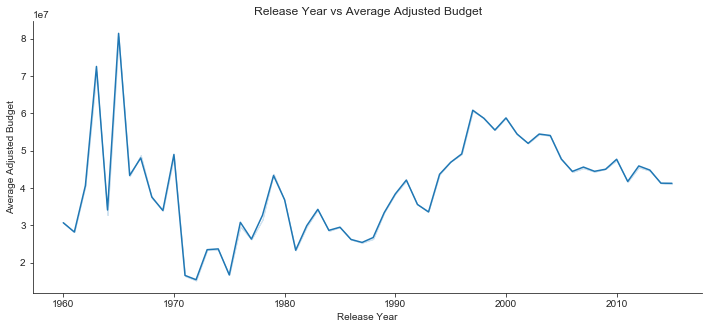

In [287]:
#Plot movie release year versus mean movie budget_adj for that year
plt.figure(figsize=(12,5));
sns.lineplot(x="release_year", y="budget_adj", data=df_adj, ci = False);
sns.despine()
plt.xlabel("Release Year")
plt.ylabel("Average Adjusted Budget")
plt.title("Release Year vs Average Adjusted Budget"); 

> I found the high average budgets between 1960 and 1970 a bit strange and wanted to do more digging to understand why that may be the case. The below cells take a look at exacly what years are driving up those averages and the movies that comprised siad years.

In [451]:
# Check what the mean budgets for each year are
df_adj.groupby('release_year')['budget_adj'].mean().sort_values(ascending = False).head()

release_year
1965    8.138583e+07
1963    7.252496e+07
1997    6.080297e+07
2000    5.873891e+07
1998    5.864323e+07
Name: budget_adj, dtype: float64

>Check what the top movie budgets are for the 1965 and 1963 years

In [452]:

df_adj[(df_adj['release_year'] == 1965) | (df_adj['release_year'] == 1963)].sort_values(by = 'budget_adj', ascending = False).describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit_adj
count,11.000000,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000,1.100000e+01
mean,1.047096,1.090136e+07,5.769170e+07,159.909091,243.909091,6.663636,1963.909091,7.655263e+07,4.024625e+08,7.000000,3.259099e+08
std,0.702465,9.000034e+06,5.786444e+07,42.788911,214.773581,0.646951,1.044466,6.370911e+07,4.004255e+08,3.847077,4.032542e+08
min,0.146033,2.500000e+06,5.000000e+06,113.000000,13.000000,5.600000,1963.000000,1.780045e+07,3.560090e+07,2.000000,-5.536451e+07
25%,0.643242,4.000000e+06,1.170176e+07,124.500000,43.500000,6.300000,1963.000000,2.848072e+07,8.212097e+07,4.000000,3.525745e+07
50%,0.920094,8.200000e+06,2.995000e+07,154.000000,187.000000,6.700000,1963.000000,5.674862e+07,2.072709e+08,6.000000,1.685157e+08
75%,1.297865,1.550000e+07,9.531034e+07,185.500000,421.500000,7.100000,1965.000000,1.089655e+08,6.674760e+08,11.000000,6.101318e+08
max,2.508235,3.111500e+07,1.632143e+08,248.000000,620.000000,7.500000,1965.000000,2.215444e+08,1.129535e+09,12.000000,1.072786e+09


> How do the top budgeted movies in the years 1963 and 1965 compare with the top budget movies of all time?

In [364]:
budgets = df_adj.groupby(['release_year', 'original_title', 'profit_adj'], as_index = False)[['budget_adj']].max().sort_values(by = 'budget_adj', ascending = False).head(10)

In [365]:
budgets

,release_year,original_title,profit_adj,budget_adj
2933,2010,The Warrior's Way,-4.139124e+08,4.250000e+08
3053,2011,Pirates of the Caribbean: On Stranger Tides,6.220462e+08,3.683713e+08
2378,2007,Pirates of the Caribbean: At World's End,6.951529e+08,3.155006e+08
2228,2006,Superman Returns,1.309698e+08,2.920507e+08
1130,1997,Titanic,2.234714e+09,2.716921e+08
2393,2007,Spider-Man 3,6.655712e+08,2.713305e+08
2897,2010,Tangled,3.317949e+08,2.600000e+08
3654,2015,Avengers: Age of Ultron,1.035032e+09,2.575999e+08
2670,2009,Harry Potter and the Half-Blood Prince,6.951764e+08,2.541001e+08
962,1995,Waterworld,1.276683e+08,2.504192e+08


In [453]:
df_adj['release_year'].value_counts().head()

2011    196
2013    179
2010    178
2009    170
2006    168
Name: release_year, dtype: int64

> Given that the top budgeted movie in 1963 and 1965 doesn't appear in the top 10 of budgeted movies of all time, there must be another reason why 1963 and 1965 appear as such high budgeted years. I suspect it has something to do with that fact that a significant number of movies were produced in later years (as evidenced by the movie value counts), so in order to properly compare budgets, we would have to normalize the data somehow.

### How have movie profits changed over time?

In [366]:
# Create a column in the data frame representing movie profits (profit is essentially revenue minus cost)
df_adj['profit_adj'] = df_adj['revenue_adj'] - df_adj['budget_adj']

/Users/Godwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


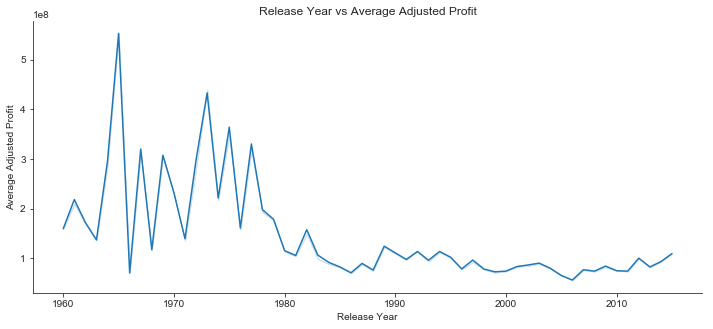

In [382]:
plt.figure(figsize=(12,5));
sns.lineplot(x="release_year", y="profit_adj", data=df_adj, ci = False);
sns.despine()
plt.xlabel("Release Year")
plt.ylabel("Average Adjusted Profit")
plt.title("Release Year vs Average Adjusted Profit"); 

> The above graph shows that movies on average are not generating as high profits as they would in earlier years. I suspect that the data is skewed for a reason similar to the Release Year vs Average Adjusted Budget plot so we would need to normalize the data to make accurate comparisons.

### Does a high budget mean a high revenue? How does budget relate to profit?

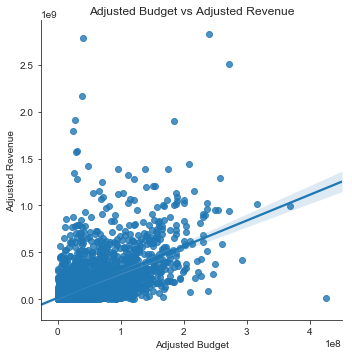

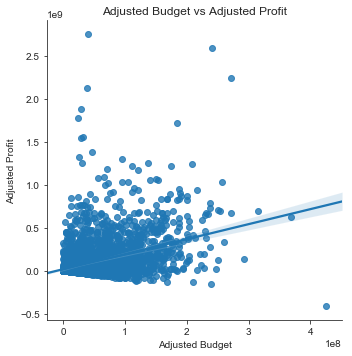

In [401]:
# fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8))
sns.lmplot(x="budget_adj", y="revenue_adj", data=df_adj);
plt.xlabel("Adjusted Budget")
plt.ylabel("Adjusted Revenue")
plt.title("Adjusted Budget vs Adjusted Revenue"); 

sns.lmplot(x="budget_adj", y="profit_adj", data=df_adj);
plt.xlabel("Adjusted Budget")
plt.ylabel("Adjusted Profit")
plt.title("Adjusted Budget vs Adjusted Profit"); 

> From this, although there is a general upward trend, we can't really say that high budgets mean high revenues, particularly becuase most of the data seems to be concentrated within the lower left corner of the plot.

### Does the day of release have an impact on how much a movie makes?

In [371]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

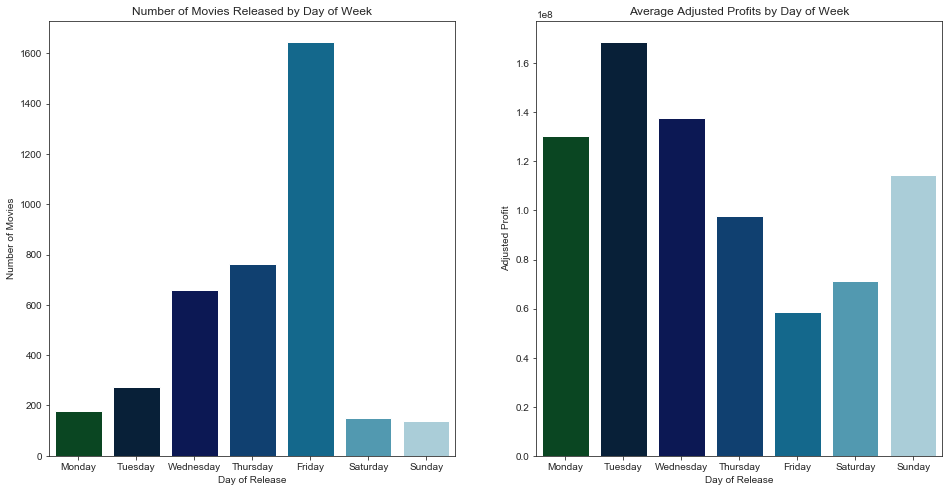

In [435]:
# Determine the most popular release day for movies

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8))
sns.countplot(x = 'day_of_release', data = df_adj, palette = 'ocean', order = days, ax = axes[0]);
axes[0].set_xlabel("Day of Release");
axes[0].set_ylabel("Number of Movies")
axes[0].set_title("Number of Movies Released by Day of Week"); 

sns.barplot(x = 'day_of_release', y = 'profit_adj', data = df_adj, palette = 'ocean', order = days, ax = axes[1], ci = None);
axes[1].set_xlabel("Day of Release");
axes[1].set_ylabel("Adjusted Profit")
axes[1].set_title("Average Adjusted Profits by Day of Week"); 

> As one could have assumed, the most popular day of release for a movie is Friday but it seems like Friday is on the lower end of adjusted profits. Tuesday seems to have the highest adjust profits. It doesn't really make sense to compare the two days given that the volume of Fridays is so much higher. If we take Friday out of the picture and compare across the movies with similar movie counts, it looks like Wednesday release dates tend to earn more overall

In [376]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

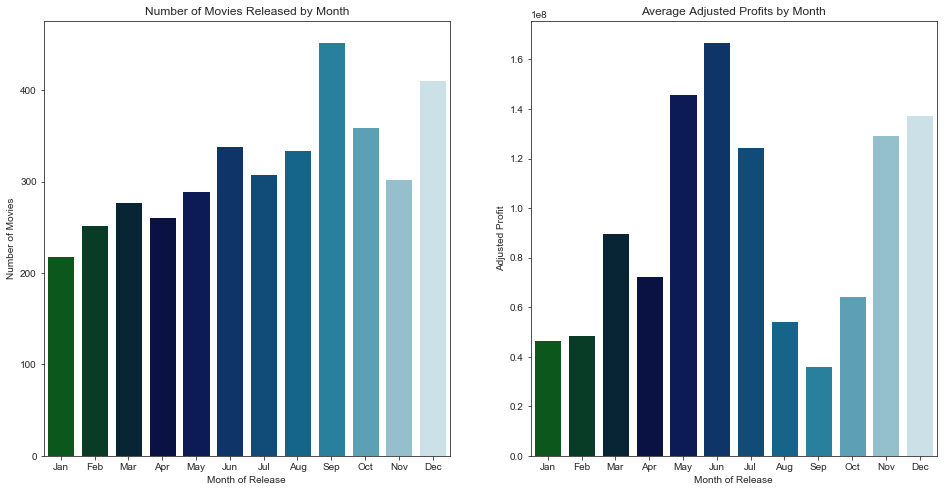

In [438]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8))

sns.countplot(x = 'month_of_release', data = df_adj, palette = 'ocean', order = months, ax = axes[0]);
axes[0].set_xlabel("Month of Release");
axes[0].set_ylabel("Number of Movies")
axes[0].set_title("Number of Movies Released by Month")


sns.barplot(x = 'month_of_release', y = 'profit_adj', data = df_adj, palette = 'ocean', order = months, ci = False, ax = axes[1]);
axes[1].set_xlabel("Month of Release");
axes[1].set_ylabel("Adjusted Profit")
axes[1].set_title("Average Adjusted Profits by Month"); 

> Looking at the data, the distrbution of the number of movies across months seems somewhat even (with the exception of Sep as an outlier). Taking this in mind, it kind of makes sense that May, June, and July have the highest profits, considering that they are in the peak months of the year

<a id='conclusions'></a>
## Conclusions


> Finally, to get a better understadning of how some of the items I looked at are correlated, we can take a look at the correlation factor for the variables.

In [398]:
df_adj.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit_adj
popularity,1.000000,0.443813,0.613903,0.213655,0.779181,0.320175,0.175744,0.395566,0.544898,0.028539,0.515238
budget,0.443813,1.000000,0.687127,0.259447,0.554799,0.023359,0.271661,0.958249,0.531068,0.027687,0.370330
revenue,0.613903,0.687127,1.000000,0.249195,0.753637,0.228385,0.141063,0.655969,0.900480,0.034638,0.850941
runtime,0.213655,0.259447,0.249195,1.000000,0.273443,0.358895,-0.113497,0.333308,0.279737,0.172439,0.234533
vote_count,0.779181,0.554799,0.753637,0.273443,1.000000,0.390028,0.209452,0.495359,0.653296,0.010977,0.612878
vote_average,0.320175,0.023359,0.228385,0.358895,0.390028,1.000000,-0.136043,0.036302,0.268551,0.125657,0.290451
release_year,0.175744,0.271661,0.141063,-0.113497,0.209452,-0.136043,1.000000,0.078133,-0.102129,-0.075782,-0.131620
budget_adj,0.395566,0.958249,0.655969,0.333308,0.495359,0.036302,0.078133,1.000000,0.568123,0.055453,0.401949
revenue_adj,0.544898,0.531068,0.900480,0.279737,0.653296,0.268551,-0.102129,0.568123,1.000000,0.054759,0.981895
release_month,0.028539,0.027687,0.034638,0.172439,0.010977,0.125657,-0.075782,0.055453,0.054759,1.000000,0.048164


> From the above, we can see that popularity and adjusted revenue/profit are strongly correlated, which makes logical sense as the movies that are the most popular would be the ones that a large number of people are willing to pay for. Also, it appears that the correlation between profit and release month is pretty low, which seems to indicate a large variability in the profit that a given movie can make given the release month.

> There were several limitations in working with this dataset, especially considering the number of values that were excluded for being null or seemingly incorrect (ie. movies with 0 budget or revenue).

> Also, it is important to note that some variables that were looked at and compared across the years (such as populartiy) might be affected by factors outside the dataset and are thus not able to be controlled for. For example popularity may take into account how often a particular movie is streamed and given that movies in earlier years may not be available for streaming, it can skew the data.